# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ola
Processing Record 2 of Set 1 | frankfurt (oder)
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | grand baie
Processing Record 5 of Set 1 | cooper's town
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | pandan
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | kumeny
Processing Record 16 of Set 1 | north ward
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | el porvenir
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | tucuma
Processing Record 22 of Set 1 | buka
Processin

Processing Record 38 of Set 4 | ghat
Processing Record 39 of Set 4 | saudarkrokur
Processing Record 40 of Set 4 | melfort
Processing Record 41 of Set 4 | pama
Processing Record 42 of Set 4 | canar
Processing Record 43 of Set 4 | quesada
Processing Record 44 of Set 4 | volodarskiy
Processing Record 45 of Set 4 | ertil'
Processing Record 46 of Set 4 | santa ana
Processing Record 47 of Set 4 | puri
Processing Record 48 of Set 4 | polyarnyy
Processing Record 49 of Set 4 | kingston
Processing Record 0 of Set 5 | khandyga
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | khorixas
Processing Record 3 of Set 5 | bardai
Processing Record 4 of Set 5 | ust'-kulom
Processing Record 5 of Set 5 | bandar-e lengeh
Processing Record 6 of Set 5 | puerto yuca
Processing Record 7 of Set 5 | ceeldheer
Processing Record 8 of Set 5 | viedma
Processing Record 9 of Set 5 | tobi village
City not found. Skipping...
Processing Record 10 of Set 5 | tura
Processing Record 11 of Set 5 | khvoynay

Processing Record 30 of Set 8 | taoudenni
Processing Record 31 of Set 8 | masaka
Processing Record 32 of Set 8 | dudinka
Processing Record 33 of Set 8 | mana
Processing Record 34 of Set 8 | olinda
Processing Record 35 of Set 8 | lianzhou
Processing Record 36 of Set 8 | kpandu
Processing Record 37 of Set 8 | guerrero negro
Processing Record 38 of Set 8 | emet
Processing Record 39 of Set 8 | nyurba
Processing Record 40 of Set 8 | ikalamavony
Processing Record 41 of Set 8 | bulgan
Processing Record 42 of Set 8 | las lajitas
Processing Record 43 of Set 8 | tavrichanka
Processing Record 44 of Set 8 | dakhla
Processing Record 45 of Set 8 | waingapu
Processing Record 46 of Set 8 | ataq
Processing Record 47 of Set 8 | nantucket
Processing Record 48 of Set 8 | nuuk
Processing Record 49 of Set 8 | al quwayrah
Processing Record 0 of Set 9 | lulea
Processing Record 1 of Set 9 | sur
Processing Record 2 of Set 9 | antalaha
Processing Record 3 of Set 9 | xining
Processing Record 4 of Set 9 | praia da

Processing Record 25 of Set 12 | la peca
Processing Record 26 of Set 12 | ribeira brava
Processing Record 27 of Set 12 | aykhal
Processing Record 28 of Set 12 | shupiyan
Processing Record 29 of Set 12 | karratha
Processing Record 30 of Set 12 | mananjary
Processing Record 31 of Set 12 | itambe
Processing Record 32 of Set 12 | stornoway
Processing Record 33 of Set 12 | saynshand
Processing Record 34 of Set 12 | margherita
Processing Record 35 of Set 12 | gazipasa
Processing Record 36 of Set 12 | jalai nur
Processing Record 37 of Set 12 | san pedro pochutla
Processing Record 38 of Set 12 | barabai
Processing Record 39 of Set 12 | kemijarvi
Processing Record 40 of Set 12 | okha
Processing Record 41 of Set 12 | cabedelo
Processing Record 42 of Set 12 | hirtshals
Processing Record 43 of Set 12 | bocas del toro
Processing Record 44 of Set 12 | punta cana
Processing Record 45 of Set 12 | nikolayevsk-on-amure
Processing Record 46 of Set 12 | alotau
City not found. Skipping...
Processing Record

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ola,59.5833,151.2833,17.86,84,56,2.47,RU,1686269377
1,frankfurt (oder),52.3471,14.5506,18.05,65,82,2.24,DE,1686269377
2,longyearbyen,78.2186,15.6401,1.91,75,75,3.09,SJ,1686269377
3,grand baie,-20.0182,57.5802,21.92,78,2,4.99,MU,1686269377
4,cooper's town,26.8667,-77.5167,27.67,76,62,6.14,BS,1686269377


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ola,59.5833,151.2833,17.86,84,56,2.47,RU,1686269377
1,frankfurt (oder),52.3471,14.5506,18.05,65,82,2.24,DE,1686269377
2,longyearbyen,78.2186,15.6401,1.91,75,75,3.09,SJ,1686269377
3,grand baie,-20.0182,57.5802,21.92,78,2,4.99,MU,1686269377
4,cooper's town,26.8667,-77.5167,27.67,76,62,6.14,BS,1686269377


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

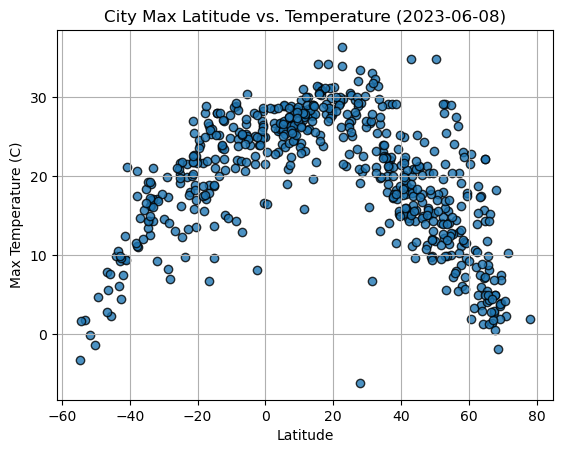

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

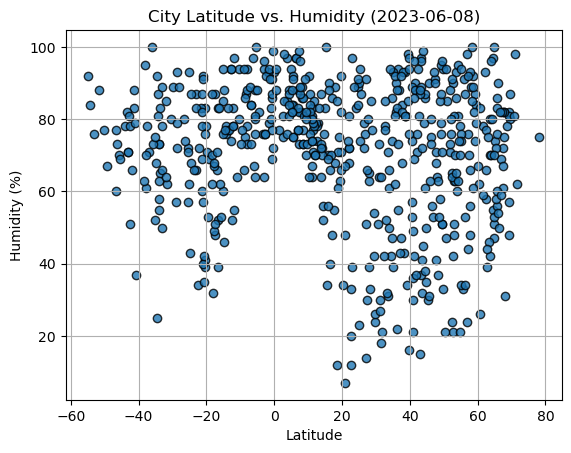

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

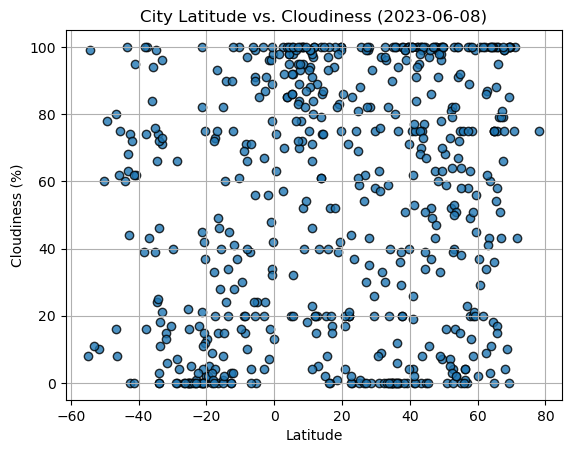

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

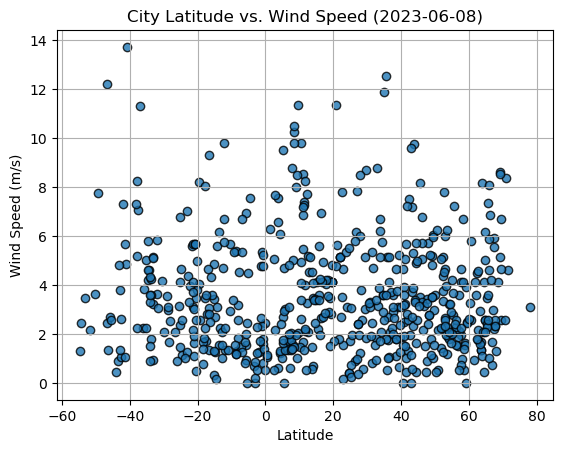

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ola,59.5833,151.2833,17.86,84,56,2.47,RU,1686269377
1,frankfurt (oder),52.3471,14.5506,18.05,65,82,2.24,DE,1686269377
2,longyearbyen,78.2186,15.6401,1.91,75,75,3.09,SJ,1686269377
4,cooper's town,26.8667,-77.5167,27.67,76,62,6.14,BS,1686269377
6,albany,42.6001,-73.9662,15.23,81,95,1.96,US,1686269377


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grand baie,-20.0182,57.5802,21.92,78,2,4.99,MU,1686269377
5,puerto natales,-51.7236,-72.4875,-0.10,88,10,2.14,CL,1686269377
9,lebu,-37.6167,-73.6500,11.10,78,100,7.05,CL,1686269378
11,blackmans bay,-43.0167,147.3167,9.29,71,63,3.78,AU,1686269378
12,edinburgh of the seven seas,-37.0676,-12.3116,14.69,71,43,11.31,SH,1686269378


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5718881910637384


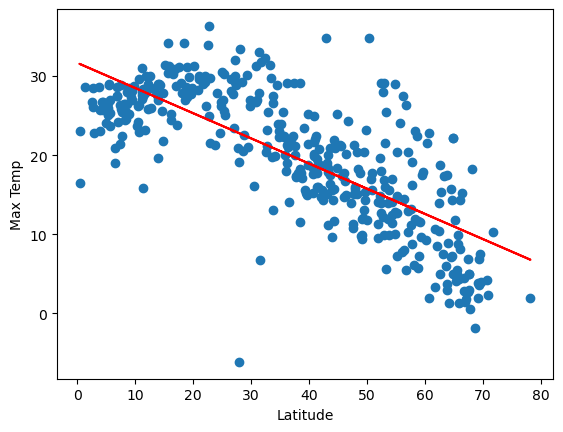

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

The r-value is: 0.6002168614392085


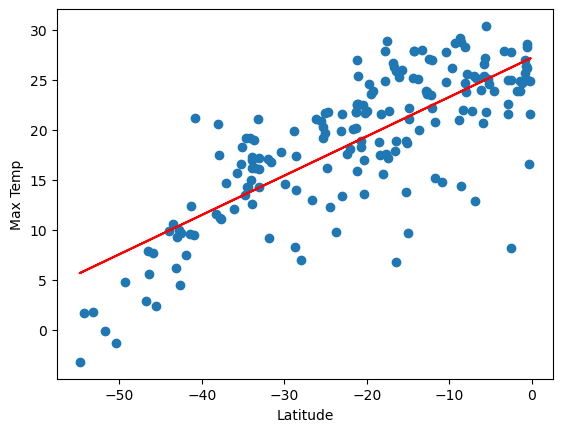

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.017265586294089457


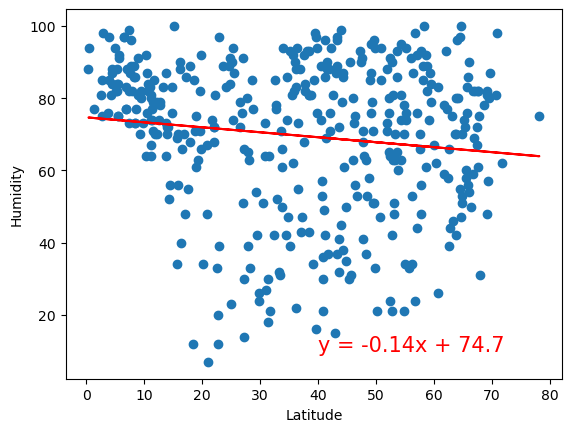

In [25]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.03623720641470723


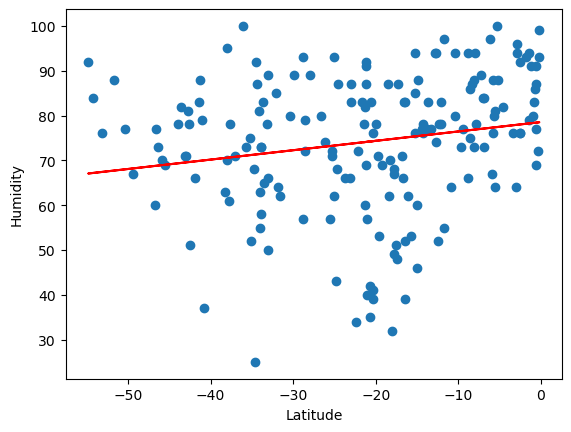

In [26]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009151952912077044


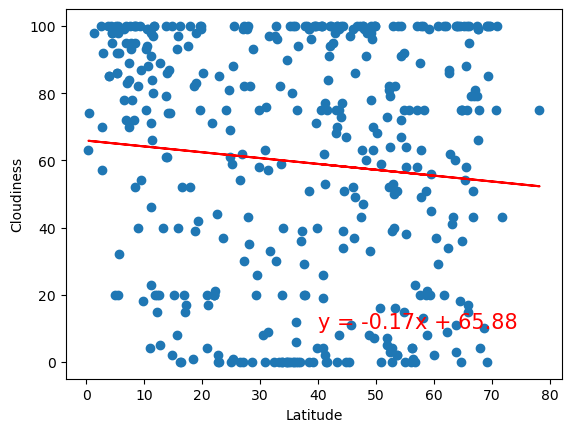

In [27]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.0003357086001148776


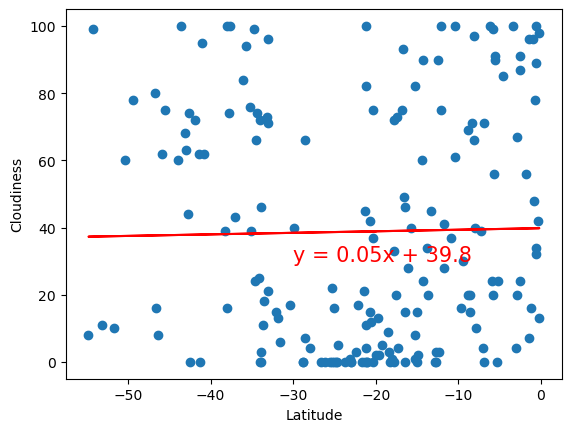

In [29]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005553076797138359


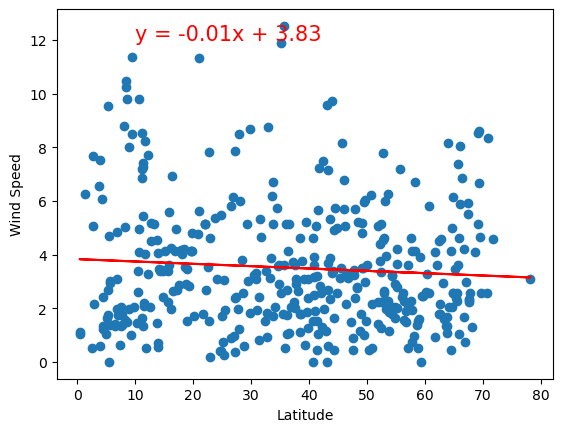

In [30]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.04515255904175726


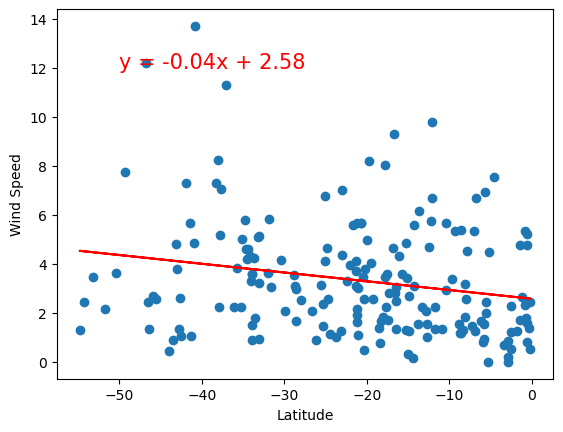

In [32]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))